In [5]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [10]:
df = pd.read_csv('../envios_productos.csv', sep = ';')

In [11]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [12]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [13]:
df.shape

(10999, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


<Figure size 720x480 with 0 Axes>

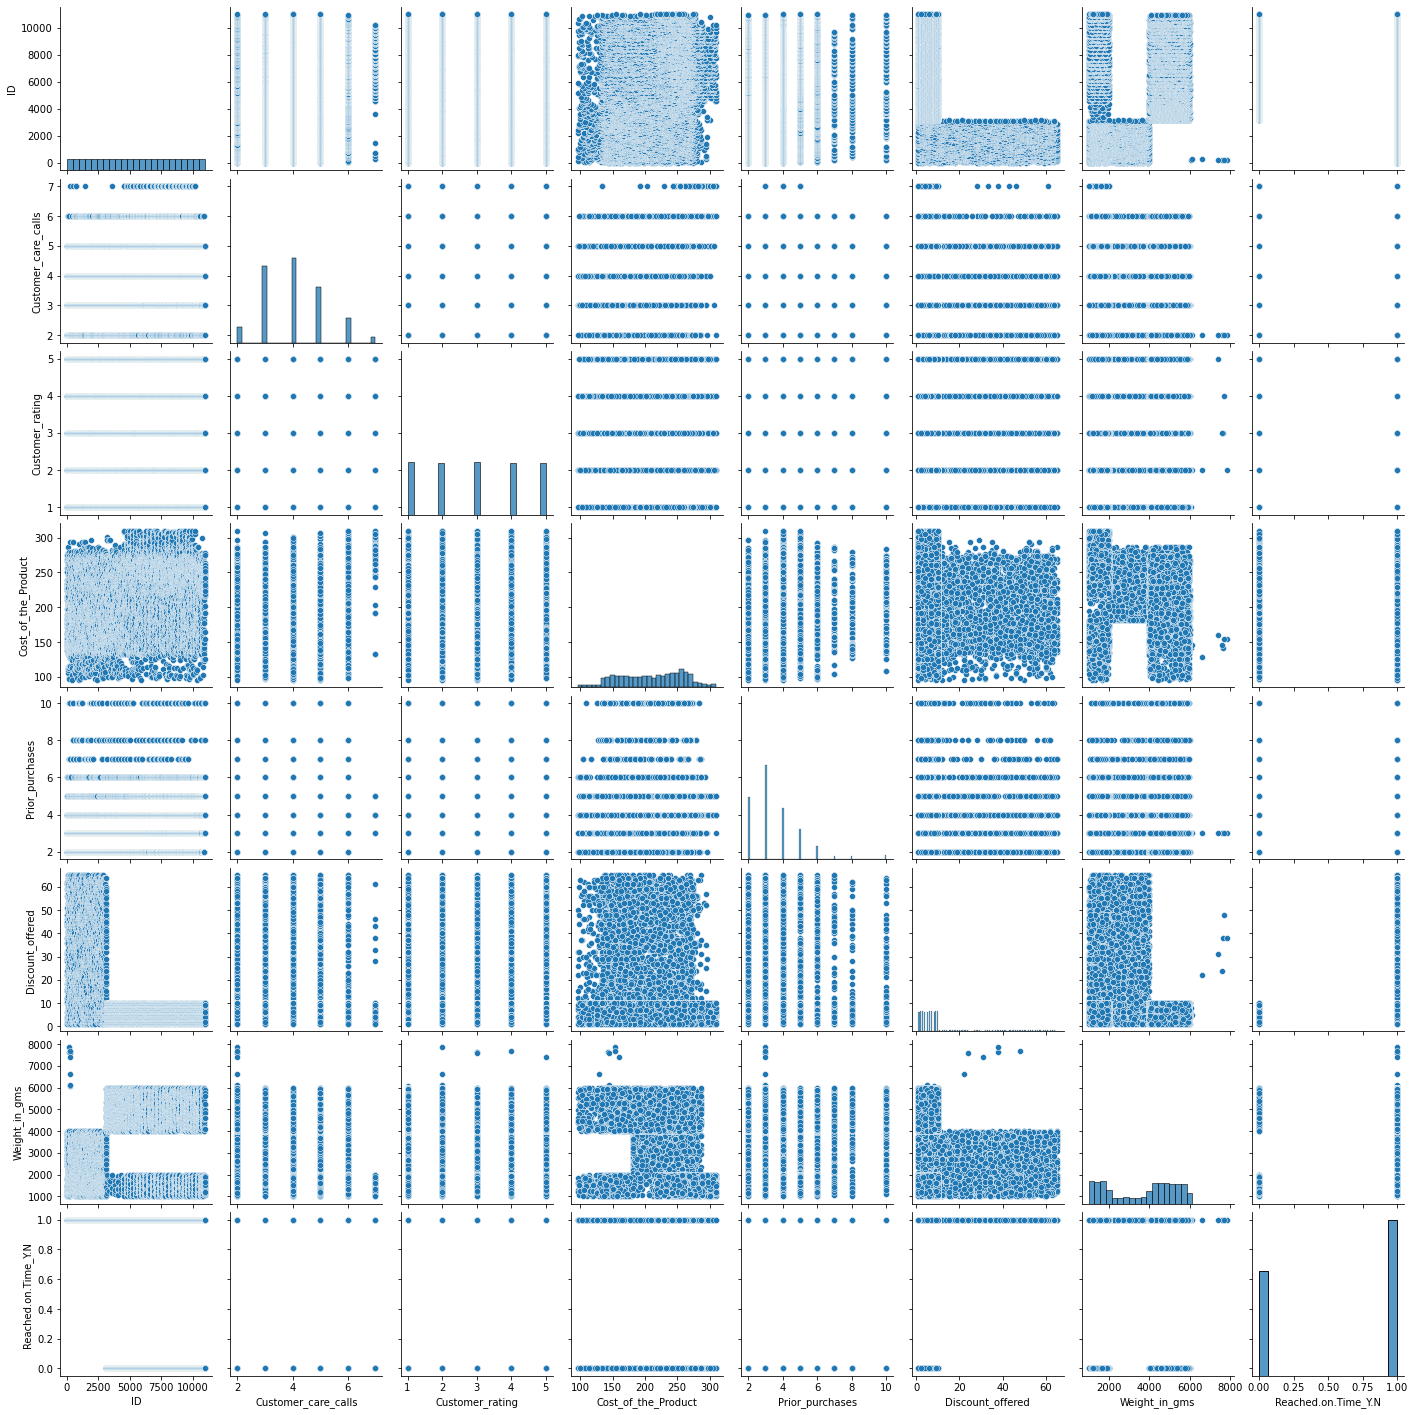

In [16]:
plt.figure(dpi = 120)
sns.pairplot(df)
plt.show()

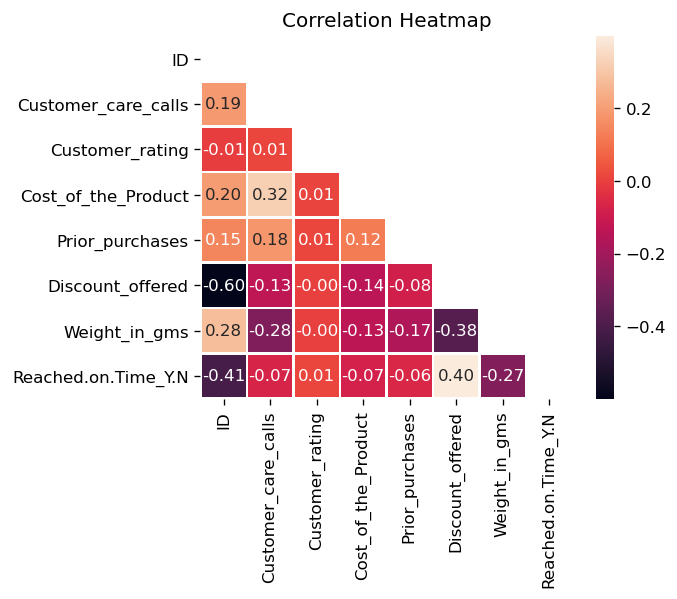

In [19]:
#Correlaciones
plt.figure(dpi = 120, figsize = (5,4))
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Joint plot de 'Customer_rating' con otras variables ==> 

Correlacion entre Customer_rating y ID ==>  -0.005722255334365404


<Figure size 500x400 with 0 Axes>

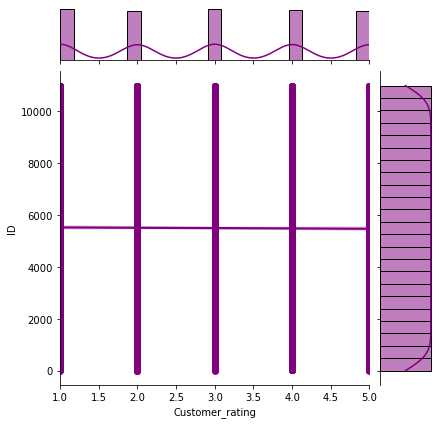

Correlacion entre Customer_rating y Customer_care_calls ==>  0.0122088041763862


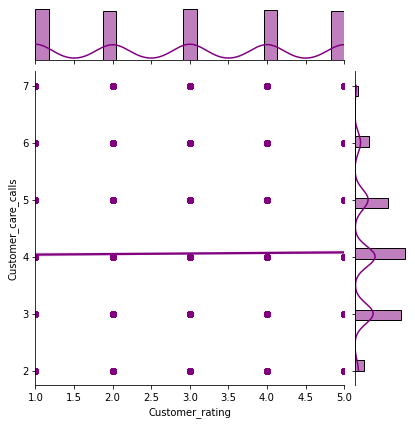

Correlacion entre Customer_rating y Cost_of_the_Product ==>  0.00926952458002452


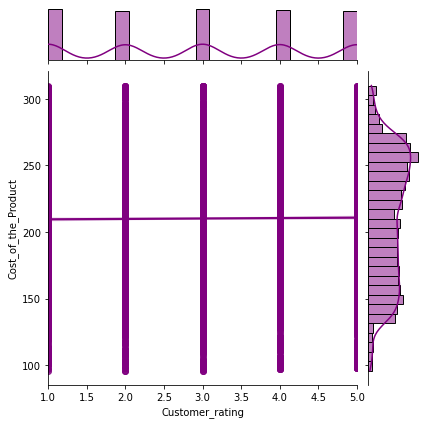

Correlacion entre Customer_rating y Prior_purchases ==>  0.013179388605121165


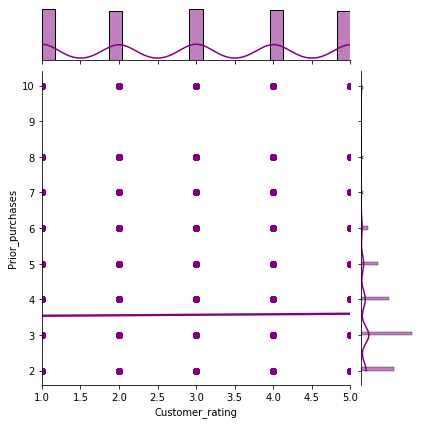

Correlacion entre Customer_rating y Discount_offered ==>  -0.003124443913316296


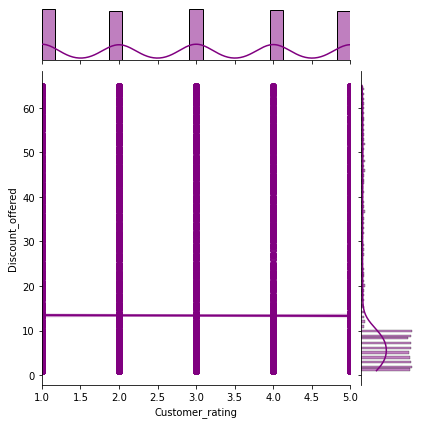

Correlacion entre Customer_rating y Weight_in_gms ==>  -0.0018968518473927952


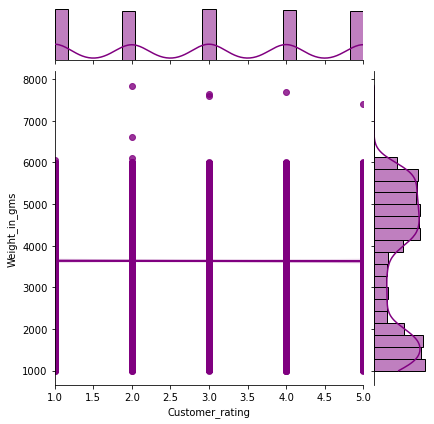

Correlacion entre Customer_rating y Reached.on.Time_Y.N ==>  0.013118604264751999


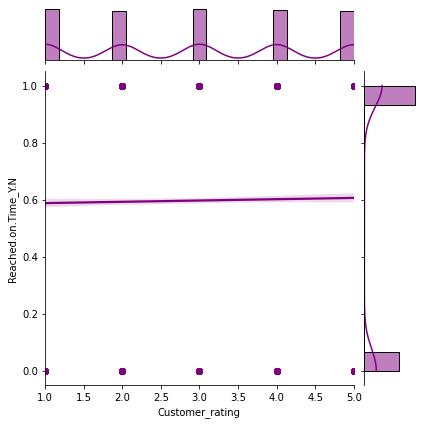

In [25]:
#JoinPlot
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de 'Customer_rating' con otras variables ==> \n")
for i in  df.columns:
    if i != 'Customer_rating' and i != 'Gender' and i!= 'Product_importance' and i!= 'Mode_of_Shipment' and i!= 'Warehouse_block':
        print(f"Correlacion entre Customer_rating y {i} ==> ",df.corr().loc['Customer_rating'][i])
        sns.jointplot(x='Customer_rating',y=i,data=df, kind = 'reg',color = 'purple')
        plt.show()